In [1]:
import pandas as pd
import numpy as np
Bike=pd.read_csv("power.csv",header=None)
DForecast=340

In [2]:
def preprocess(data,window):
    matrix=data.as_matrix()
    array = []
    y=[]
    #len(data)資料筆數
    for index in range(len(matrix) - window):
        array.append(matrix[index : index + window])
        y.append(matrix[index +window])
    array=np.array(array)
    y=np.array(y)
    return array,y

In [4]:
train=Bike.iloc[((DForecast-1-14)*96):((DForecast-1)*96)]
test =Bike.iloc[((DForecast-1-1)*96):(DForecast*96)]
mean =np.mean(train)[0]
std  =np.std(train)[0]

In [7]:
test.shape

(192, 1)

In [338]:
def normalize(value):
    result=(value-mean)/std
    return result
def normalize_inverse(value):
    result=value*std+mean
    return result

In [339]:
all_data=normalize(Bike)

In [340]:
x_all_data,y_all_data=preprocess(all_data,96)
x_all_data.shape

(34944, 96, 1)

In [341]:
x_all_data=x_all_data.reshape(x_all_data.shape[0],1,x_all_data.shape[1])

In [342]:
train_normalize=normalize(train)
test_normalize=normalize(test)

In [343]:
x_train,y_train=preprocess(train_normalize,96)
x_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1])
y_train=y_train.reshape(y_train.shape[0])

In [344]:
x_test,y_test=preprocess(test_normalize,96)
x_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1])
y_test=y_test.reshape(y_test.shape[0])

In [345]:
import tensorflow as tf

In [346]:
def reset_graph(seed=50):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [347]:
reset_graph()
n_steps = 1
n_inputs = 96
n_neurons = 5
n_outputs = 1
n_layers = 1
keep_prob = 0.5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs],name='X')
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs],name='y')

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
lstm_drop = [tf.contrib.rnn.DropoutWrapper(cell, state_keep_prob=keep_prob)
              for cell in lstm_cells]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_drop)
outputs_LSTM, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
outputs = tf.layers.dense(outputs_LSTM, n_outputs)

In [348]:
learning_rate = 0.0001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [349]:
n_epochs = 500 #疊代次數n_epochs*(trainshape/batch_size)次
batch_size = 96 #一次丟batch_size個
data_size = x_train.shape[0]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        all_range = np.array(range(data_size))
        np.random.shuffle(all_range)
        for iteration in range( data_size // batch_size):
            n_batch = all_range[iteration*batch_size:(iteration+1)*batch_size]
            x_batch = x_train[n_batch]
            y_batch = y_train[n_batch].reshape(-1, n_steps, n_outputs)
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
    
    all_pred = sess.run(outputs, feed_dict={X: x_test})
    values = sess.run(tf.trainable_variables())
    all_state = sess.run(states, feed_dict={X: x_all_data})

In [350]:
y_pred=all_pred[:,:,:].reshape(96,1)#

In [351]:
Y=normalize_inverse(y_pred)#

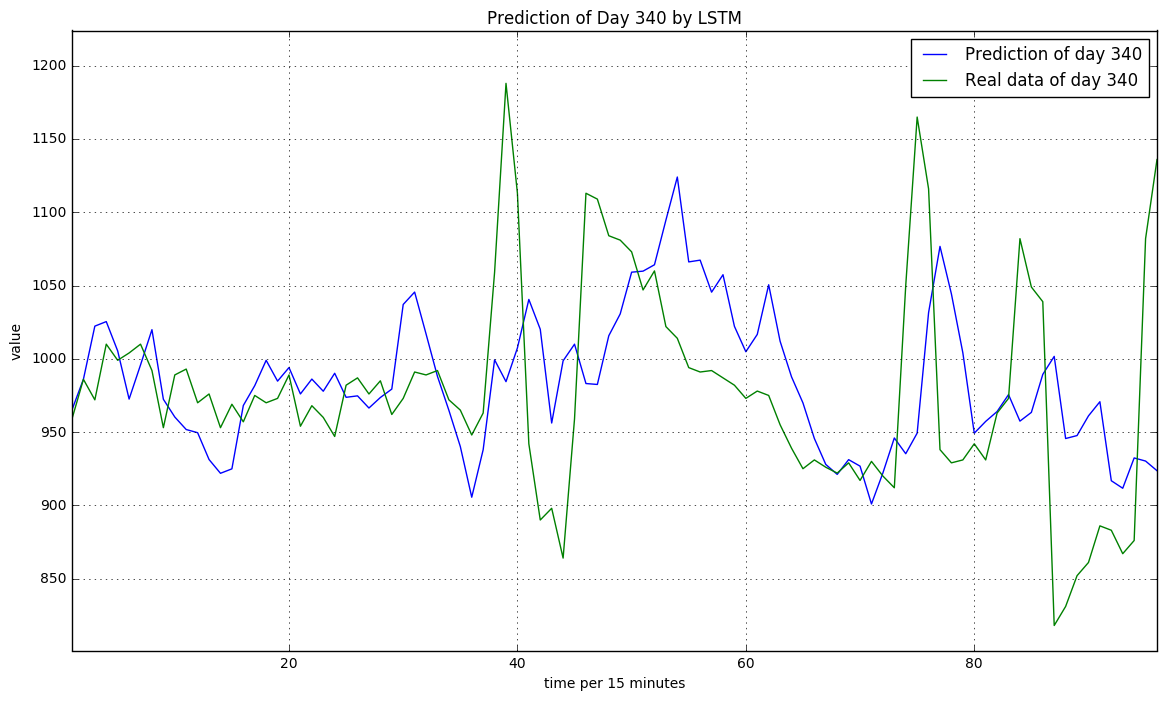

RMSE of Prediction : 72.9387619977
NSR: 0.0745644217341


In [352]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
x=np.array(list(range(1,(96+1))))
plt.plot(x, Y, 'b', label='Prediction of day '+str(DForecast))
plt.plot(x,test[96:] , 'g', label='Real data of day '+str(DForecast))
plt.xlim(np.min(x), np.max(x)); plt.ylim(np.min(Y)-100, np.max(Y)+100)
plt.legend()
plt.xlabel('time per 15 minutes'); plt.ylabel('value')
plt.title("Prediction of Day "+str(DForecast)+" by LSTM")
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
print("RMSE of Prediction",":",np.sqrt(mean_squared_error(Y,test[96:])))
print("NSR:",np.sqrt(mean_squared_error(Y,test[96:]))/np.mean(test[96:]).values[0])

#### 每一類抽樣去跑

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
Data=pd.read_csv("power.csv",header=None)
ArfimaPredictclass1=pd.read_csv("ArfimaPredictclass1.csv")
ArfimaPredictclass2=pd.read_csv("ArfimaPredictclass2.csv")
ArfimaPredictclass3=pd.read_csv("ArfimaPredictclass3.csv")
ArfimaPredictclass4=pd.read_csv("ArfimaPredictclass4.csv")
ArfimaPredictclass5=pd.read_csv("ArfimaPredictclass5.csv")
def preprocess(data,window):
    matrix=data.as_matrix()
    array = []
    y=[]
    #len(data)資料筆數
    for index in range(len(matrix) - window):
        array.append(matrix[index : index + window])
        y.append(matrix[index +window])
    array=np.array(array)
    y=np.array(y)
    return array,y
def normalize(value):
    result=(value-mean)/std
    return result
def normalize_inverse(value):
    result=value*std+mean
    return result
def reset_graph(seed=50):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [74]:
DClass1=[int(x) for x in list(ArfimaPredictclass1.columns)]
DClass2=[int(x) for x in list(ArfimaPredictclass2.columns)]
DClass3=[int(x) for x in list(ArfimaPredictclass3.columns)]
DClass4=[int(x) for x in list(ArfimaPredictclass4.columns)]
DClass5=[int(x) for x in list(ArfimaPredictclass5.columns)]
DClass1to5=[DClass1,DClass2,DClass3,DClass4,DClass5]

In [75]:
for Class in range(5):
    DClass=DClass1to5[Class]
    #DClass=list(filter(lambda x: x>7, DClass))
    ClassofForecast=Class+1
    RMSEpredictionClass, NSRClass=[],[]
    print("Class",ClassofForecast,"抽樣天數如下:")
    for day in range(len(DClass)):
        DForecast=DClass[day]

        train=Data.iloc[:((DForecast-1)*96)]#Data.iloc[((DForecast-1-7)*96):((DForecast-1)*96)]
        test =Data.iloc[((DForecast-1-1)*96):(DForecast*96)]
        mean,std=np.mean(train)[0], np.std(train)[0]

        all_data=normalize(Data)
        x_all_data,y_all_data=preprocess(all_data,96)
        x_all_data=x_all_data.reshape(x_all_data.shape[0],1,x_all_data.shape[1])
        train_normalize,test_normalize=normalize(train), normalize(test)
        x_train,y_train=preprocess(train_normalize,96)
        x_train,y_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1]), y_train.reshape(y_train.shape[0])
        x_test,y_test=preprocess(test_normalize,96)
        x_test,y_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1]), y_test.reshape(y_test.shape[0])

        reset_graph()
        n_steps = 1
        n_inputs = 96
        n_neurons = 5
        n_outputs = 1
        n_layers = 1
        keep_prob = 0.5

        X = tf.placeholder(tf.float32, [None, n_steps, n_inputs],name='X')
        y = tf.placeholder(tf.float32, [None, n_steps, n_outputs],name='y')

        lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
                      for layer in range(n_layers)]
        lstm_drop = [tf.contrib.rnn.DropoutWrapper(cell, state_keep_prob=keep_prob)
                      for cell in lstm_cells]
        multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_drop)
        outputs_LSTM, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
        outputs = tf.layers.dense(outputs_LSTM, n_outputs)

        learning_rate = 0.0001

        loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)

        init = tf.global_variables_initializer()

        n_epochs = 500 #疊代次數n_epochs*(trainshape/batch_size)次
        batch_size = 96 #一次丟batch_size個
        data_size = x_train.shape[0]

        with tf.Session() as sess:
            init.run()
            for epoch in range(n_epochs):
                all_range = np.array(range(data_size))
                np.random.shuffle(all_range)
                for iteration in range( data_size // batch_size):
                    n_batch = all_range[iteration*batch_size:(iteration+1)*batch_size]
                    x_batch = x_train[n_batch]
                    y_batch = y_train[n_batch].reshape(-1, n_steps, n_outputs)
                    sess.run(training_op, feed_dict={X: x_batch, y: y_batch})

            all_pred = sess.run(outputs, feed_dict={X: x_test})
            values = sess.run(tf.trainable_variables())
            all_state = sess.run(states, feed_dict={X: x_all_data})
        y_pred=all_pred[:,:,:].reshape(96,1)#
        Y=normalize_inverse(y_pred)#

        NSR=np.sqrt(mean_squared_error(Y,test[96:]))/np.mean(test[96:]).values[0] #雜訊訊號比
        RMSEprediction=np.sqrt(mean_squared_error(Y,test[96:])) #RMSE
        print("Day",str(DForecast))
        RMSEpredictionClass.append(RMSEprediction)
        NSRClass.append(NSR)
    print("Class",ClassofForecast)
    print("平均NSR(%)",np.mean(NSRClass)*100)
    print("平均RMSE",np.mean(RMSEpredictionClass))

Class 1 抽樣天數如下:
Day 18
Day 47
Day 235
Day 249
Day 256
Day 340
Class 1
平均NSR(%) 3.65201540574
平均RMSE 36.2382785836
Class 2 抽樣天數如下:
Day 8
Day 23
Day 38
Day 42
Day 45
Day 69
Day 70
Day 71
Day 76
Day 84
Day 86
Day 92
Day 98
Day 104
Day 106
Day 107
Day 170
Day 232
Day 238
Day 245
Day 248
Day 251
Day 252
Day 255
Day 262
Day 265
Day 267
Day 268
Day 273
Day 274
Day 275
Day 279
Day 286
Day 287
Day 296
Day 309
Day 315
Day 318
Day 325
Day 356
Day 357
Class 2
平均NSR(%) 2.84099233279
平均RMSE 35.8927208359
Class 3 抽樣天數如下:
Day 13
Day 15
Day 29
Day 44
Day 48
Day 57
Day 83
Day 323
Day 329
Day 338
Day 342
Day 349
Class 3
平均NSR(%) 3.50306253645
平均RMSE 46.6731673675
Class 4 抽樣天數如下:
Day 26
Day 60
Day 68
Day 75
Day 103
Day 123
Day 137
Day 138
Day 145
Day 152
Day 158
Day 159
Day 173
Day 179
Day 180
Day 194
Day 207
Day 242
Day 264
Day 278
Day 284
Day 298
Day 312
Day 313
Day 326
Day 341
Day 348
Day 354
Day 360
Class 4
平均NSR(%) 2.50176364026
平均RMSE 22.6061790532
Class 5 抽樣天數如下:
Day 94
Day 112
Day 118
Day 119
Day 

In [76]:
import datetime
datetime.datetime.now() #跑了12個半小時= =

datetime.datetime(2018, 3, 28, 6, 7, 55, 509601)

In [1]:
import datetime
print(datetime.datetime.now()) #跑了12個半小時= =

2018-03-28 16:17:23.942422


#### 只用來預測某一天

In [5]:
DForecast=251

train=Data.iloc[((DForecast-1-14)*96):((DForecast-1)*96)]
test =Data.iloc[((DForecast-1-1)*96):(DForecast*96)]
mean,std=np.mean(train)[0], np.std(train)[0]

all_data=normalize(Data)
x_all_data,y_all_data=preprocess(all_data,96)
x_all_data=x_all_data.reshape(x_all_data.shape[0],1,x_all_data.shape[1])
train_normalize,test_normalize=normalize(train), normalize(test)
x_train,y_train=preprocess(train_normalize,96)
x_train,y_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1]), y_train.reshape(y_train.shape[0])
x_test,y_test=preprocess(test_normalize,96)
x_test,y_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1]), y_test.reshape(y_test.shape[0])

reset_graph()
n_steps = 1
n_inputs = 96
n_neurons = 5
n_outputs = 1
n_layers = 1
keep_prob = 0.5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs],name='X')
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs],name='y')

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
lstm_drop = [tf.contrib.rnn.DropoutWrapper(cell, state_keep_prob=keep_prob)
              for cell in lstm_cells]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_drop)
outputs_LSTM, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
outputs = tf.layers.dense(outputs_LSTM, n_outputs)

learning_rate = 0.0001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_epochs = 500 #疊代次數n_epochs*(trainshape/batch_size)次
batch_size = 96 #一次丟batch_size個
data_size = x_train.shape[0]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        all_range = np.array(range(data_size))
        np.random.shuffle(all_range)
        for iteration in range( data_size // batch_size):
            n_batch = all_range[iteration*batch_size:(iteration+1)*batch_size]
            x_batch = x_train[n_batch]
            y_batch = y_train[n_batch].reshape(-1, n_steps, n_outputs)
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
    
    all_pred = sess.run(outputs, feed_dict={X: x_test})
    values = sess.run(tf.trainable_variables())
    all_state = sess.run(states, feed_dict={X: x_all_data})
y_pred=all_pred[:,:,:].reshape(96,1)#
Y=normalize_inverse(y_pred)#

NSR=np.sqrt(mean_squared_error(Y,test[96:]))/np.mean(test[96:]).values[0] #雜訊訊號比
RMSEprediction=np.sqrt(mean_squared_error(Y,test[96:])) #RMSE
print("Day",str(DForecast))
print("RMSE of Prediction:",RMSEprediction)
print("NSR:",NSR)

Day 251
RMSE of Prediction: 73.9639874889
NSR: 0.059017253322
